# Image Processing

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,rotation_range=180,vertical_flip=False)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
x_train=train_datagen.flow_from_directory(r'E:\AIML_Externship\AI_Project\Dataset\train_set',target_size=(128,128),class_mode = 'binary',batch_size=32)

Found 436 images belonging to 2 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r'E:\AIML_Externship\AI_Project\Dataset\test_set',target_size=(128,128),class_mode = 'binary',batch_size=32)

Found 121 images belonging to 2 classes.


In [6]:
x_train.class_indices

{'forest': 0, 'with fire': 1}

In [7]:
x_test.class_indices

{'forest': 0, 'with fire': 1}

# MODEL BUILDING

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [9]:
import warnings

In [10]:
warnings.filterwarnings('ignore')

In [11]:
model = Sequential()

In [12]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(128,128,3)))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())

In [15]:
#hidden layer - 1
#model.add(Dense(300,activation = 'relu'))

In [16]:
#hiddenlayer - 2
#model.add(Dense(150,activation='relu'))

In [17]:
#output layer
#model.add(Dense(2,activation='sigmoid'))

In [18]:
#model.add(Dense(output_dim=150,init='uniform',activation='relu'))

In [19]:
#model.add(Dense(output_dim=1,activation='sigmoid',init='uniform'))

In [20]:
model.add(Dense(kernel_initializer='uniform',activation='relu',units=150))

In [21]:
model.add(Dense(kernel_initializer='uniform',activation='sigmoid',units=1))

In [22]:
print(x_train.class_indices)

{'forest': 0, 'with fire': 1}


In [23]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 150)               19051350  
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 19,052,397
Trainable params: 19,052,397
Non-trainable params: 0
____________________________________________

In [25]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 19s 1s/step - loss: 1.0616 - accuracy: 0.6376 - val_loss: 0.2291 - val_accuracy: 0.9339
Epoch 2/10
14/14 [==============================] - 18s 1s/step - loss: 0.3876 - accuracy: 0.8096 - val_loss: 0.1864 - val_accuracy: 0.9091
Epoch 3/10
14/14 [==============================] - 19s 1s/step - loss: 0.2584 - accuracy: 0.8945 - val_loss: 0.1224 - val_accuracy: 0.9587
Epoch 4/10
14/14 [==============================] - 18s 1s/step - loss: 0.2132 - accuracy: 0.9037 - val_loss: 0.1174 - val_accuracy: 0.9504
Epoch 5/10
14/14 [==============================] - 18s 1s/step - loss: 0.2144 - accuracy: 0.9151 - val_loss: 0.0963 - val_accuracy: 0.9587
Epoch 6/10
14/14 [==============================] - 18s 1s/step - loss: 0.1767 - accuracy: 0.9243 - val_loss: 0.0867 - val_accuracy: 0.9669
Epoch 7/10
14/14 [==============================] - 19s 1s/step - loss: 0.1659 - accuracy: 0.9358 - val_loss: 0.0728 - val_accuracy: 0.9835
Epoch 8/10
14/14 [==

In [26]:
model.save('forestfire.h5')

# Prediction

In [27]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model = load_model('forestfire.h5')

In [29]:
img = image.load_img(r'E:\AIML_Externship\AI_Project\Dataset\train_set\with fire\with fire (14).jpg',target_size=(128,128))

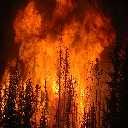

In [30]:
img

In [31]:
x=image.img_to_array(img)

In [32]:
x=np.expand_dims(x,axis=0)

In [33]:
pred=np.argmax(model.predict(x),axis=1)
 

In [34]:
#pred=model.predict_classes(x)

In [35]:
pred


array([0], dtype=int64)

In [36]:
import matplotlib.pyplot as plt

In [37]:
val_imgs, val_labels = x_test.__getitem__(0)

In [38]:
preds = model.predict(val_imgs)

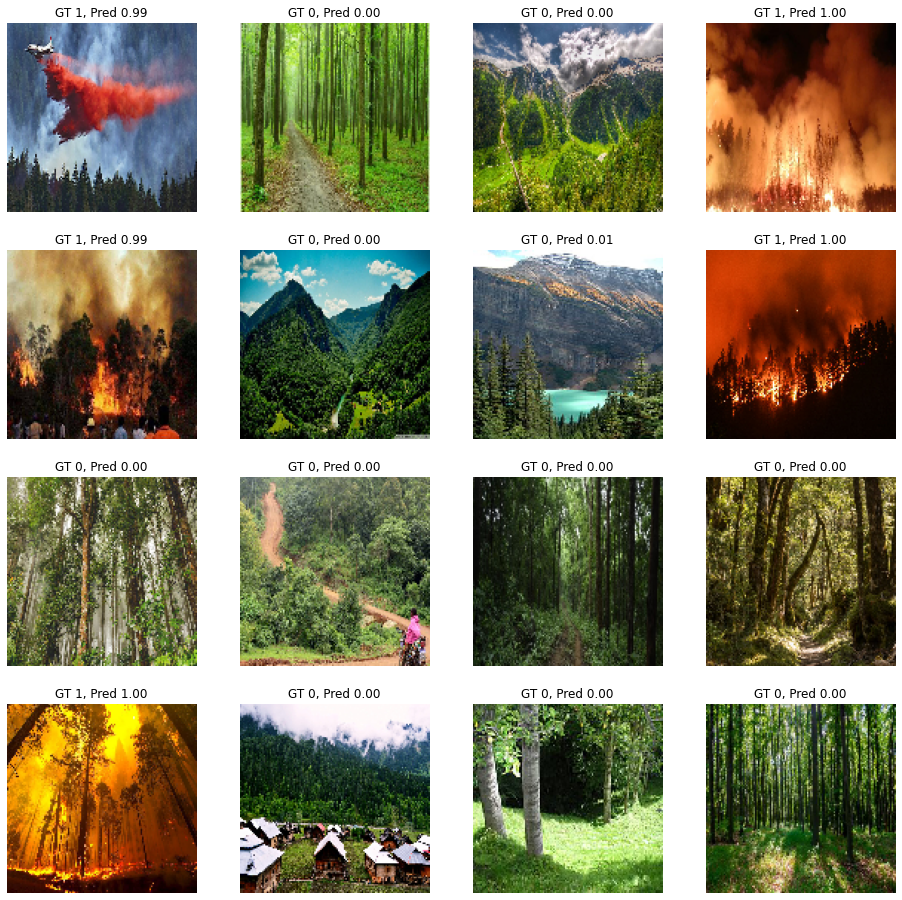

In [39]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for img, label, pred, ax in zip(val_imgs, val_labels, preds, axes.flatten()):
    ax.imshow(img)
    ax.set_title('GT %d, Pred %.2f' % (label, pred))
    ax.set_axis_off()
   

# opencv prediction

In [40]:
cv2.__version__

'4.5.5'

In [43]:
import cv2
#import facevec
import numpy as np
import smtplib
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models  import load_model
from twilio.rest import Client

model = load_model(r'forestfire.h5') 
video = cv2.VideoCapture(0)
name = ['forest','with fire']
    
while(1):
    success, frame = video.read()
    cv2.imwrite("1.jpg",frame)
    img = image.load_img("1.jpg",target_size = (128,128,3))
    x  = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    pred=np.argmax(model.predict(x))
    p = pred[0][0]
    print(pred)
    cv2.putText(frame, np.array(x_train)[indices.astype(int)])
    #out_images = np.array(X_train)[indices.astype(int)]
    
    pred = np.argmax(model.predict(x))
    if pred[0]==1:
        account_sid = 'AC3976c6b423091df9d192da7ef1c88b70'
        auth_token = '169b415a37998c6999959dac1ecf5d20'
        client = Client(account_sid, auth_token)

        message = client.messages \
        .create(
         body='Forest Fire is detected, stay alert',
         from_=' +13072434612', #twilio free number
         to='+917033603628')
        print(message.sid)
    
        print('Fire Detected')
        print ('SMS sent!')
        break
    else:
        print("no danger")
       #break
    cv2.imshow("image",frame)
   
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

video.release()
cv2.destroyAllWindows()

IndexError: invalid index to scalar variable.